# Ticker Agent

In [1]:
from app.assistant.assistant_module import AssistantModule
from app.assistant.ticker.agent import TickerAgent
from app.assistant.ticker.state import TickerAgentConfig, TickerAgentState
from langgraph.graph import END, StateGraph, START

module = AssistantModule()
agent_srv: TickerAgent = module.ticker_agent()
workflow = StateGraph(
    state_schema=TickerAgentState,
    config_schema=TickerAgentConfig,
)

agent = agent_srv._get_workflow(workflow)

from IPython.display import Image, display

# Setting xray to 1 will show the internal structure of the nested graph
display(Image(agent.get_graph(xray=1).draw_mermaid_png()))

AttributeError: 'StateGraph' object has no attribute 'logger'

# Transaction Agent

In [3]:
from IPython.display import Image, display

from app.assistant.transaction.agent import TransactionAgent
from app.prompt.prompt_service import PromptService

ps = PromptService()
display(Image(TransactionAgent(ps).get_display_graph()))

# Money Transfer Agent

In [ ]:
from IPython.display import Image, display

from app.assistant.transfer.agent import TransferAgent
from app.prompt.prompt_service import PromptService

ps = PromptService()
display(Image(TransferAgent(ps).get_display_graph()))

# RENEW CARD AGENT

2024-09-09 04:41:53.391 | DEBUG    | app.assistant.card.agent:_get_workflow:116 | Display graph  - Wiring the workflow...
2024-09-09 04:41:53.404 | INFO     | app.assistant.card.agent:_get_workflow:154 | Display graph  - Returning workflow...


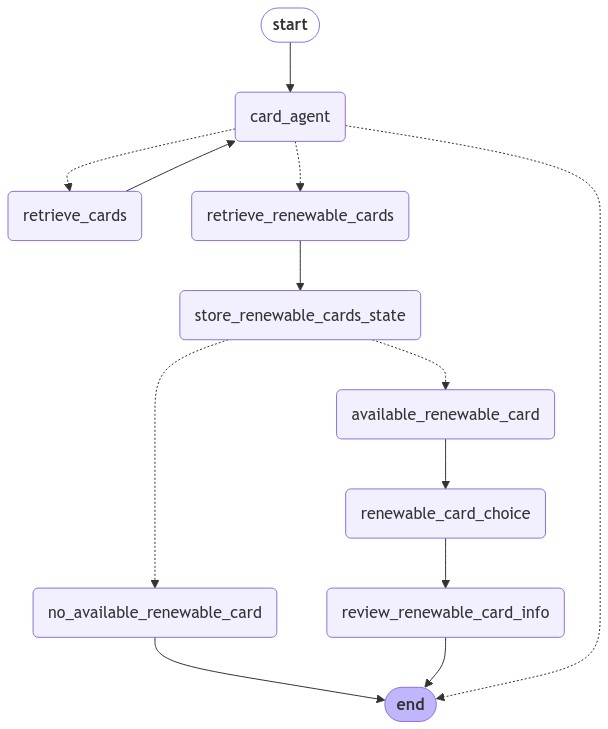

In [1]:
from IPython.display import Image, display

from app.assistant.card.agent import CardAgent
from app.prompt.prompt_service import PromptService

ps = PromptService()
display(Image(CardAgent(ps).get_display_graph()))

## Term Deposit Agent

#### Original

2024-09-18 16:37:17.214 | DEBUG    | app.assistant.term_deposit.common.agent:_get_workflow:94 |   - Wiring the workflow...
2024-09-18 16:37:17.216 | INFO     | app.assistant.term_deposit.common.agent:_get_workflow:191 |   - Returning workflow...


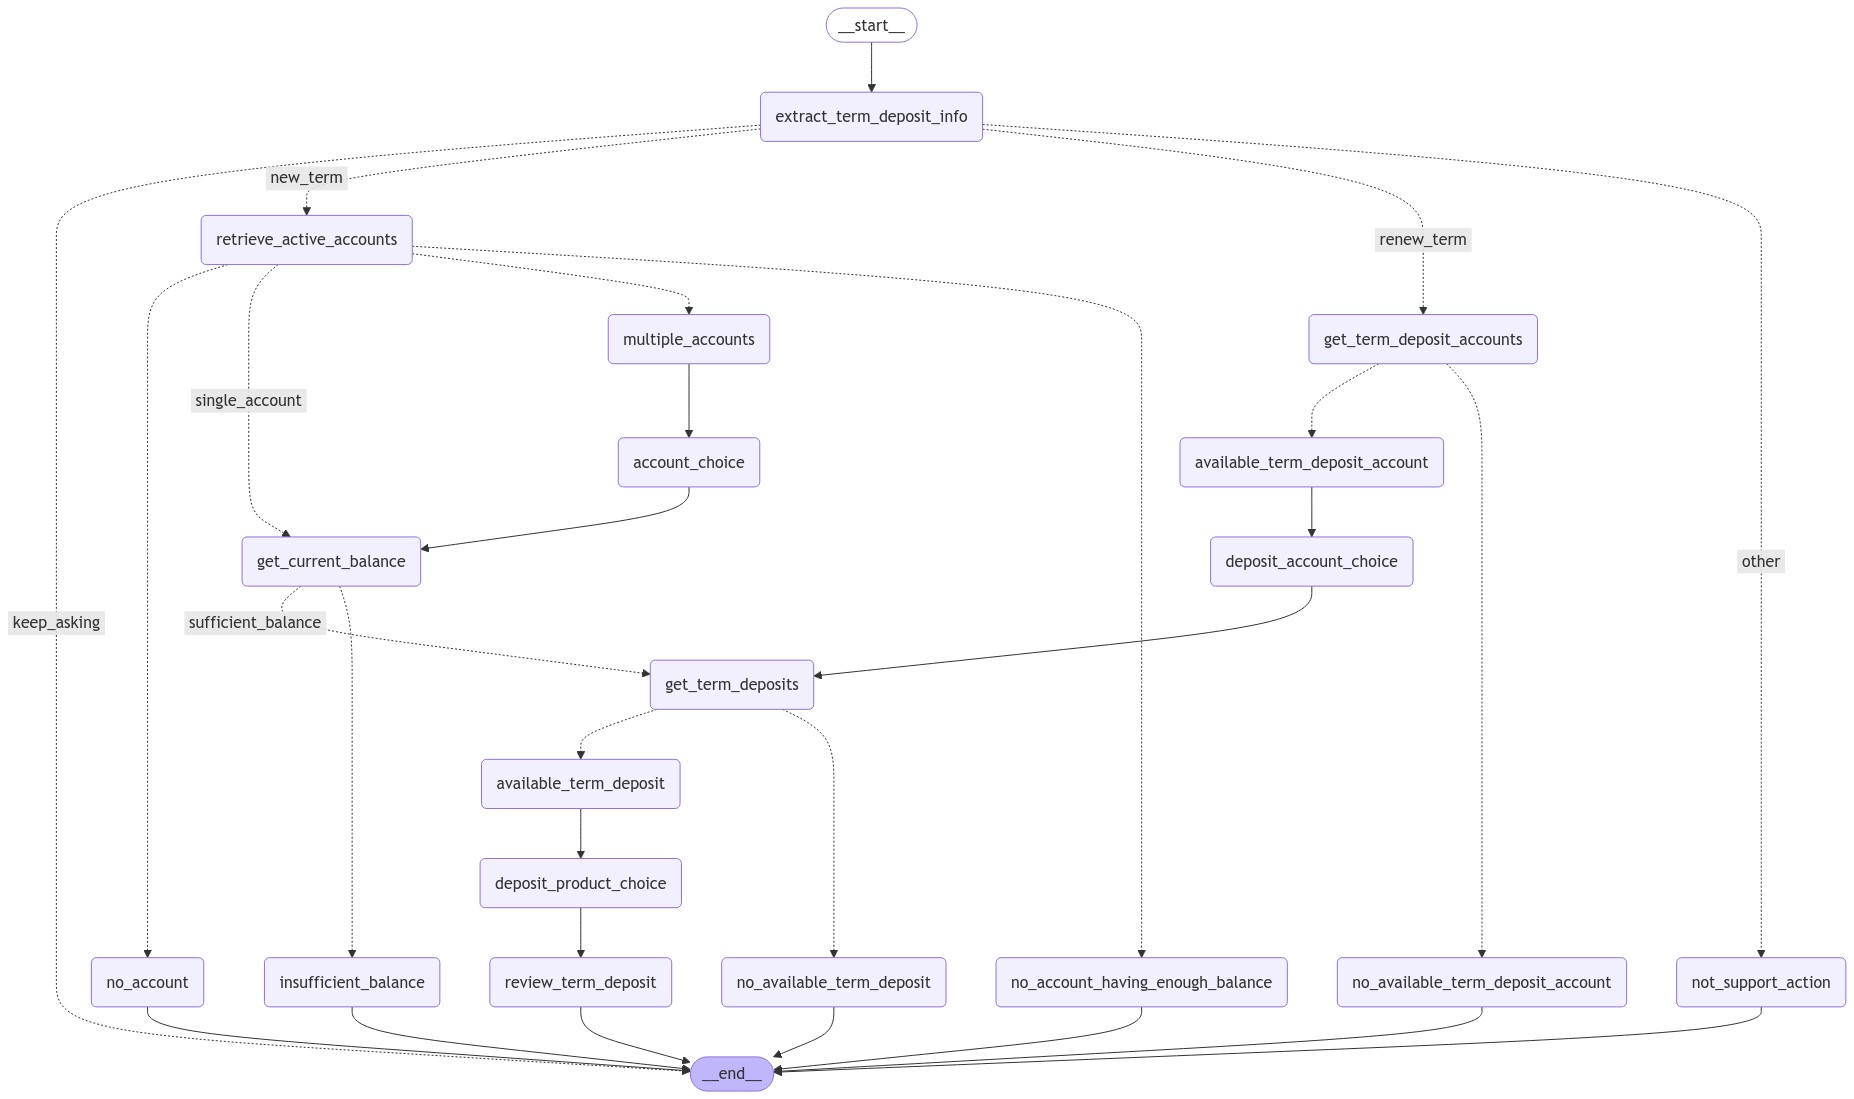

In [1]:
from IPython.display import Image, display
from app.assistant.term_deposit.common.agent import TermDepositAgent
from app.core.context import RequestContext
from app.prompt.prompt_service import PromptService

ps = PromptService()

workflow = TermDepositAgent(ps)._get_workflow(RequestContext(""))
display(Image(workflow.compile().get_graph(xray=1).draw_mermaid_png()))

### Modified

In [1]:
from IPython.display import Image, display
from app.assistant_v2.term_deposit.graph.term_deposit_graph import TermDepositGraph

term_deposit = TermDepositGraph()
print((await term_deposit.get_graph()).draw_mermaid())
display(Image((await term_deposit.get_graph()).draw_mermaid_png()))

%%{init: {'flowchart': {'curve': 'linear'}}}%%
graph TD;
	__start__([<p>__start__</p>]):::first
	extract_info(extract_info)
	get_accounts(get_accounts)
	no_account(no_account)
	present_accounts(present_accounts)
	select_active_account(select_active_account)
	get_products(get_products)
	no_product(no_product)
	present_products(present_products)
	select_product(select_product)
	get_balance(get_balance)
	low_active_balance(low_active_balance)
	get_deposit_account(get_deposit_account)
	no_deposit_account(no_deposit_account)
	present_deposit_accounts(present_deposit_accounts)
	select_deposit_account(select_deposit_account)
	review_deposit(review_deposit)
	low_all_balance(low_all_balance)
	not_supported_action(not_supported_action)
	__end__([<p>__end__</p>]):::last
	__start__ --> extract_info;
	low_active_balance --> __end__;
	low_all_balance --> __end__;
	no_account --> __end__;
	no_deposit_account --> __end__;
	no_product --> __end__;
	not_supported_action --> __end__;
	present_accounts --

ValueError: Failed to render the graph using the Mermaid.INK API. Status code: 404.